In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, decomposition,metrics

In [ ]:
iris = datasets.load_iris()

pca = decomposition.PCA(n_components=2, whiten=True, svd_solver='randomized')
pca = pca.fit(iris.data)
X = pca.transform(iris.data)

#X = iris.data[:, :2]
y = iris.target


In [ ]:
def make_meshgrid(x, y, h=.02):
    
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def clf_meshgrid(clf,x,y):
  cc = clf.predict(np.c_[x.ravel(),y.ravel()])
  return cc

xx, yy = make_meshgrid(X[:, 0], X[:, 1])

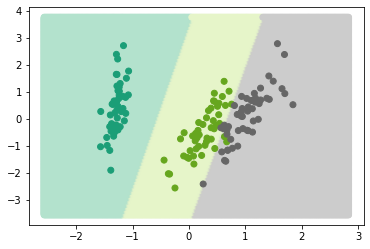

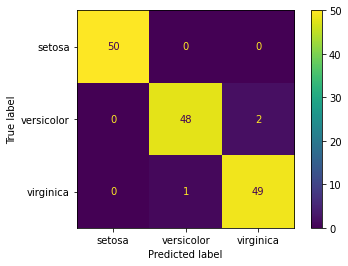

In [ ]:
svmLinear = svm.SVC(kernel='linear')
svmLinear = svmLinear.fit(X,y)

c = clf_meshgrid(svmLinear,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmLinear, X, y,include_values=True,display_labels=iris.target_names)

plt.show()

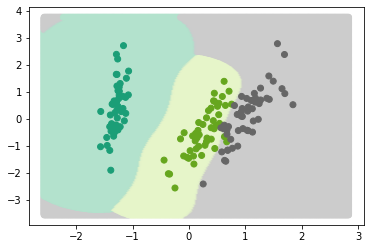

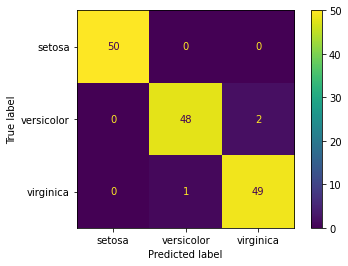

In [ ]:
svmRBF = svm.SVC(kernel='rbf', gamma=1)
svmRBF = svmRBF.fit(X,y)

c = clf_meshgrid(svmRBF,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmRBF, X, y,include_values=True,display_labels=iris.target_names)
plt.show()

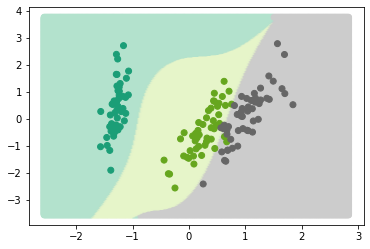

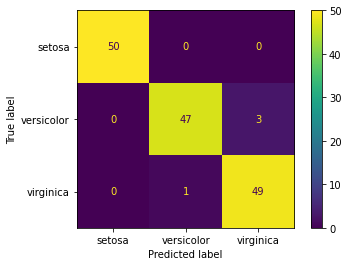

In [ ]:
svmPoly = svm.SVC(kernel='poly',degree=3,gamma=3)
svmPoly = svmPoly.fit(X,y)

c = clf_meshgrid(svmPoly,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmPoly, X, y,include_values=True,display_labels=iris.target_names)
plt.show()

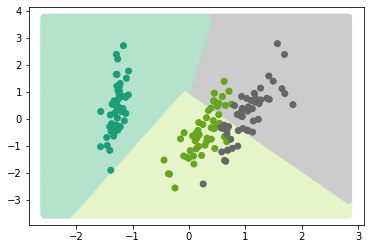

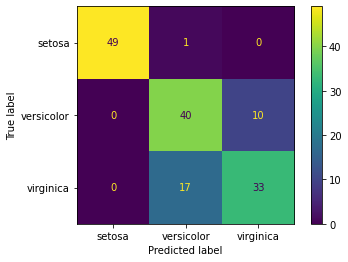

In [ ]:
svmSig = svm.SVC(kernel='sigmoid',gamma=.01)
svmSig = svmSig.fit(X,y)

c = clf_meshgrid(svmSig,xx,yy)

plt.scatter(xx,yy,c=c,cmap='Pastel2')
plt.scatter(X[:, 0], X[:, 1],c=y,cmap='Dark2')
metrics.plot_confusion_matrix(svmSig, X, y,include_values=True,display_labels=iris.target_names)
plt.show()